In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

##1. Load the dataset

In [23]:
df = pd.read_csv('titanic.csv')

## 2. Understand the data

In [24]:
print("Shape:", df.shape)
print("Info:")
print(df.info())
print("Describe:")
print(df.describe())

Shape: (891, 12)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Describe:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008

## 3. Fill missing Age using SimpleImputer

In [25]:
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## 4. Fill missing Cabin with "Unknown"

In [26]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

## 5. Fill missing Embarked with the mode

In [27]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## 6. Analyse Passenger Class

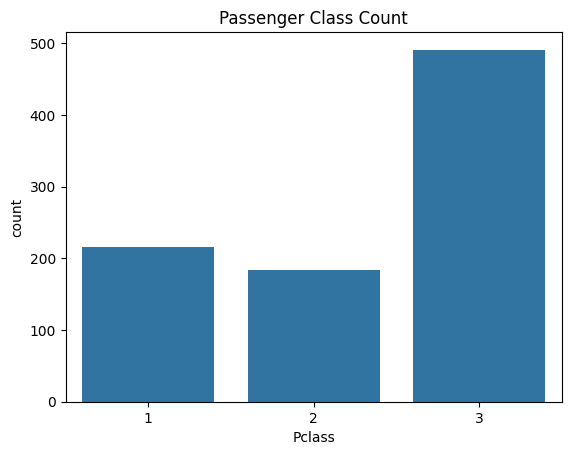

In [28]:
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Count')
plt.show()

## 7. Female passengers who survived

In [29]:
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("Female survivors:")
print(female_survived[['Name']])

Female survivors:
                                                  Name
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
..                                                 ...
874              Abelson, Mrs. Samuel (Hannah Wizosky)
875                   Najib, Miss. Adele Kiamie "Jane"
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880       Shelley, Mrs. William (Imanita Parrish Hall)
887                       Graham, Miss. Margaret Edith

[233 rows x 1 columns]


## 8. Passengers in 3rd class and under 18

In [30]:
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("3rd class under 18:")
print(third_class_under_18)

3rd class under 18:
     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
10            11         1       3          Sandstrom, Miss. Marguerite Rut   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
22            23         1       3              McGowan, Miss. Anna "Annie"   
..           ...       ...     ...                                      ...   
844          845         0       3                      Culumovic, Mr. Jeso   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
852          853         0       3                  Boulos, Miss. Nourelain   
869          870         1       3          Johnson, Master. Harold Theodor   
875          876         1       3         Najib, Miss. Adele Kiamie "Jane"   

        Sex   Age  SibSp  Parch

## 9. 1st class passengers older than 40

In [31]:
first_class_above_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("1st class above 40:")
print(first_class_above_40)

1st class above 40:
     PassengerId  Survived  Pclass  \
6              7         0       1   
11            12         1       1   
35            36         0       1   
52            53         1       1   
54            55         0       1   
..           ...       ...     ...   
856          857         1       1   
857          858         1       1   
862          863         1       1   
871          872         1       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
35                      Holverson, Mr. Alexander Oskar    male  42.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
54                      Ostby, Mr. Engelhart Cornelius    male  65.0      0   
..                                               

## 10. Who survived from above category

In [32]:
survived_above_40 = first_class_above_40[first_class_above_40['Survived'] == 1]
print("Survived among them:")
print(survived_above_40)

Survived among them:
     PassengerId  Survived  Pclass  \
11            12         1       1   
52            53         1       1   
187          188         1       1   
194          195         1       1   
195          196         1       1   
268          269         1       1   
275          276         1       1   
299          300         1       1   
337          338         1       1   
366          367         1       1   
380          381         1       1   
449          450         1       1   
453          454         1       1   
460          461         1       1   
496          497         1       1   
513          514         1       1   
523          524         1       1   
556          557         1       1   
571          572         1       1   
587          588         1       1   
591          592         1       1   
599          600         1       1   
621          622         1       1   
630          631         1       1   
645          646         1   

## 11. Male passengers with fare > 100

In [33]:
rich_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("Male passengers with fare > 100:")
print(rich_males)

Male passengers with fare > 100:
     PassengerId  Survived  Pclass  \
27            28         0       1   
118          119         0       1   
305          306         1       1   
332          333         0       1   
373          374         0       1   
377          378         0       1   
390          391         1       1   
438          439         0       1   
505          506         0       1   
527          528         0       1   
544          545         0       1   
550          551         1       1   
557          558         0       1   
659          660         0       1   
660          661         1       1   
679          680         1       1   
698          699         0       1   
737          738         1       1   
802          803         1       1   

                                           Name   Sex        Age  SibSp  \
27               Fortune, Mr. Charles Alexander  male  19.000000      3   
118                    Baxter, Mr. Quigg Edmond  male  2

## 12. Embarked from C and in class 2

In [34]:
c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("Embarked C, Class 2:")
print(c_class2)

Embarked C, Class 2:
     PassengerId  Survived  Pclass  \
9             10         1       2   
43            44         1       2   
122          123         0       2   
135          136         0       2   
181          182         0       2   
292          293         0       2   
308          309         0       2   
361          362         0       2   
389          390         1       2   
473          474         1       2   
547          548         1       2   
608          609         1       2   
685          686         0       2   
817          818         0       2   
827          828         1       2   
866          867         1       2   
874          875         1       2   

                                                  Name     Sex        Age  \
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.000000   
122                               Nasser, Mr. Nicholas    male 

## 13. More than 2 siblings/spouses

In [35]:
large_family = df[df['SibSp'] > 2]
print("More than 2 SibSp:")
print(large_family)

More than 2 SibSp:
     PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
24            25         0       3   
27            28         0       1   
50            51         0       3   
59            60         0       3   
63            64         0       3   
68            69         1       3   
71            72         0       3   
85            86         1       3   
88            89         1       1   
119          120         0       3   
159          160         0       3   
164          165         0       3   
171          172         0       3   
176          177         0       3   
180          181         0       3   
182          183         0       3   
201          202         0       3   
229          230         0       3   
233          234         1       3   
261          262         1       3   
266          267         0       3   
278          279         0       3   
324          325         0     

## 14. Did not survive, no family aboard

In [36]:
no_family_no_survive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("Died and no family:")
print(no_family_no_survive)

Died and no family:
     PassengerId  Survived  Pclass                                  Name  \
4              5         0       3              Allen, Mr. William Henry   
5              6         0       3                      Moran, Mr. James   
6              7         0       1               McCarthy, Mr. Timothy J   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
882          883         0       3          Dahlberg, Miss. Gerda Ulrika   
883          884         0       2         Banfield, Mr. Frederick James   
884          885         0       3                Sutehall, Mr. Henry Jr   
886          887         0       2                 Montvila, Rev. Juozas   
890          891         0       3                   Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch            Ticket     Fare    

## 15. Top 5 oldest passengers who survived

In [37]:
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("Top 5 oldest survivors:")
print(oldest_survivors)

Top 5 oldest survivors:
     PassengerId  Survived  Pclass                                       Name  \
630          631         1       1       Barkworth, Mr. Algernon Henry Wilson   
275          276         1       1          Andrews, Miss. Kornelia Theodosia   
483          484         1       3                     Turkula, Mrs. (Hedwig)   
570          571         1       2                         Harris, Mr. George   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch       Ticket     Fare    Cabin Embarked  
630    male  80.0      0      0        27042  30.0000      A23        S  
275  female  63.0      1      0        13502  77.9583       D7        S  
483  female  63.0      0      0         4134   9.5875  Unknown        S  
570    male  62.0      0      0  S.W./PP 752  10.5000  Unknown        S  
829  female  62.0      0      0       113572  80.0000      B28        S  


## 16. Passengers who paid zero fare

In [38]:
free_passengers = df[df['Fare'] == 0]
print("Passengers who paid 0 fare:")
print(free_passengers)

Passengers who paid 0 fare:
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2  

## 17. Train-test split

In [39]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Training set size:", train_set.shape)
print("Testing set size:", test_set.shape)

Training set size: (712, 12)
Testing set size: (179, 12)
